In [1]:
import seaborn as sns
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('https://raw.githubusercontent.com/amandeepsingh1111/Classification-Problem/master/Data/train_credit_card.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/amandeepsingh1111/Classification-Problem/master/Data/test_credit_card.csv')

In [4]:
train = train_df.copy()
test = test_df.copy()

In [5]:
print('Shape before deleting duplicate values of train:', train.shape)
print('Shape before deleting duplicate values of test:', test.shape,'\n')

# Removing duplicate rows if any
train = train.drop_duplicates()
test = test.drop_duplicates()

print('Shape After deleting duplicate values of train:', train.shape)
print('Shape After deleting duplicate values of test:', test.shape)

Shape before deleting duplicate values of train: (245725, 11)
Shape before deleting duplicate values of test: (105312, 10) 

Shape After deleting duplicate values of train: (245725, 11)
Shape After deleting duplicate values of test: (105312, 10)


In [6]:
#sample = pd.read_csv('sample_credit_card.csv')
#sample.head()

In [7]:
train.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0


In [8]:
test.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No


In [9]:
train.Is_Lead.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

### Distribution of target variable
* Target variable is `Is_Lead`

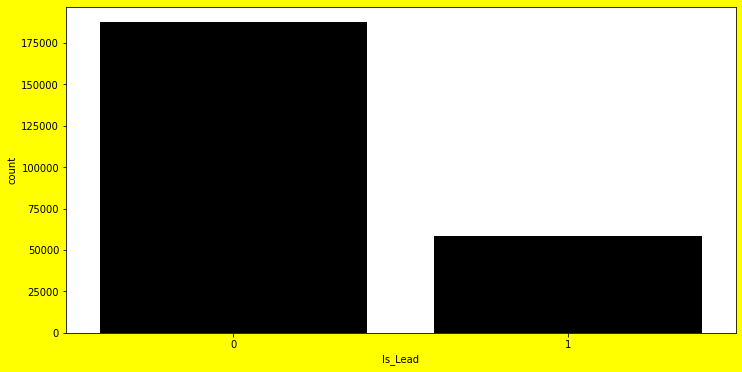

In [10]:
%matplotlib inline
######### Matplotlib ##########
# Creating Bar chart as the Target variable is Categorical
#GroupedData=train.groupby('Is_Lead').size()
#GroupedData.plot(kind='bar', figsize=(4,3))

######## Seaborn ##############
plt.figure(figsize=(12,6), facecolor='yellow')
sns.countplot(train['Is_Lead'], color='black');

######### Plotly ##############
#fig = go.Figure(data=[go.Histogram(x=train['Is_Lead'])])
#fig.update_layout(autosize=False,width=600,height=600)
#fig.show()

**# Remove those variables from data which have too many missing values (Missing Values > 30%)**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 32.5+ MB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.8+ MB


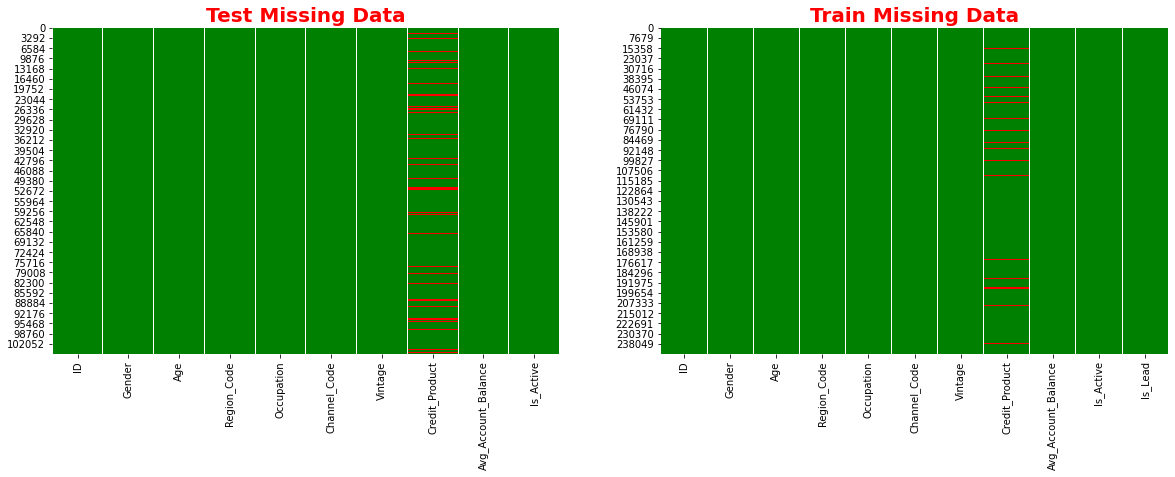

In [13]:
train_cols = train.columns 
test_cols = test.columns
colours = ['g', 'r'] 
f, ax = plt.subplots(nrows=1,ncols=2,figsize = (20,6))
ax[0].set_title('Test Missing Data', color='red',size=20,weight='bold')
ax[1].set_title('Train Missing Data',color='red',size=20,weight='bold')
sns.set_style("whitegrid")
sns.heatmap(test[test_cols].isnull(), cmap=sns.color_palette(colours),ax=ax[0],cbar=False)
sns.heatmap(train[train_cols].isnull(), cmap=sns.color_palette(colours),ax=ax[1],cbar=False);

In [14]:
#### Percent of missing values in train dataset
for col in train.columns:
    prct = np.mean(train[col].isnull())
    print('{} : {} %'.format(col, round(prct*100,1)))

ID : 0.0 %
Gender : 0.0 %
Age : 0.0 %
Region_Code : 0.0 %
Occupation : 0.0 %
Channel_Code : 0.0 %
Vintage : 0.0 %
Credit_Product : 11.9 %
Avg_Account_Balance : 0.0 %
Is_Active : 0.0 %
Is_Lead : 0.0 %


In [15]:
#### Percent of missing values in test dataset
for col in test.columns:
    prct = np.mean(test[col].isnull())
    print('{} : {} %'.format(col, round(prct*100,1)))

ID : 0.0 %
Gender : 0.0 %
Age : 0.0 %
Region_Code : 0.0 %
Occupation : 0.0 %
Channel_Code : 0.0 %
Vintage : 0.0 %
Credit_Product : 11.9 %
Avg_Account_Balance : 0.0 %
Is_Active : 0.0 %


In [16]:
# Looking at the descriptive statistics of the data
train.describe(include='all')

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
count,245725,245725,245725.000000,245725,245725,245725,245725.000000,216400,2.457250e+05,245725,245725.000000
unique,245725,2,NaN,35,4,4,NaN,2,NaN,2,NaN
top,AW4VU6B4,Male,NaN,RG268,Self_Employed,X1,NaN,No,NaN,No,NaN
freq,1,134197,NaN,35934,100886,103718,NaN,144357,NaN,150290,NaN
mean,NaN,NaN,43.856307,NaN,NaN,NaN,46.959141,NaN,1.128403e+06,NaN,0.237208
std,NaN,NaN,14.828672,NaN,NaN,NaN,32.353136,NaN,8.529364e+05,NaN,0.425372
min,NaN,NaN,23.000000,NaN,NaN,NaN,7.000000,NaN,2.079000e+04,NaN,0.000000
25%,NaN,NaN,30.000000,NaN,NaN,NaN,20.000000,NaN,6.043100e+05,NaN,0.000000
50%,NaN,NaN,43.000000,NaN,NaN,NaN,32.000000,NaN,8.946010e+05,NaN,0.000000
75%,NaN,NaN,54.000000,NaN,NaN,NaN,73.000000,NaN,1.366666e+06,NaN,0.000000


In [17]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
for i in [train, test]:
    print(i.nunique(),'\n')
    

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64 

ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64 



In [18]:
print(train.Credit_Product.unique())
print(test.Credit_Product.unique()) 

['No' nan 'Yes']
['Yes' nan 'No']


In [19]:
train.drop(['ID','Region_Code'], axis=1, inplace=True)

In [20]:
for i in train.columns:
    print(i,' : ' ,train[i].unique(),'\n')

Gender  :  ['Female' 'Male'] 

Age  :  [73 30 56 34 62 48 40 55 53 27 31 79 33 46 59 65 37 44 32 50 70 25 52 26
 67 29 41 49 63 61 64 60 76 57 36 28 58 43 35 71 82 45 42 54 47 78 51 68
 83 39 84 24 38 74 81 69 75 85 66 80 72 77 23] 

Occupation  :  ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] 

Channel_Code  :  ['X3' 'X1' 'X2' 'X4'] 

Vintage  :  [ 43  32  26  19  33  20  13  38  49 123  14  31  57  69  97  15  63  21
  99  56  87  62  55 103 104  93  61  91  27  39  50  45  25 117  80  81
  73  67 109  92 122  75  79 121 111 116  85 115  86  37  74 110  44   9
  68  51  98 105 127 129 133   8   7 128 135 134] 

Credit_Product  :  ['No' nan 'Yes'] 

Avg_Account_Balance  :  [1045696  581988 1484315 ...  368949 1925586 1129276] 

Is_Active  :  ['No' 'Yes'] 

Is_Lead  :  [0 1] 



In [21]:
train.columns

Index(['Gender', 'Age', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

In [22]:
cat_var = ['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']
cont_var = ['Age','Vintage','Avg_Account_Balance']

In [23]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, ax=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,8))
    fig.autofmt_xdate(rotation=45)  ########  Rotation of ticks
    

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        ax[plotNumber].set_title(colName,fontsize=18,color='#894512')           #####  Set title for each subplot
        ax[plotNumber].tick_params(axis='both', labelsize=14 )                  ###### Increase ticklabel size of x and y axis
        sns.countplot(data=inpData, x=colName,ax=ax[plotNumber])                #####  (seaborn)
        #inpData.groupby(colName).size().plot(kind='bar',ax=ax[plotNumber])     ### working same as above line (pandas)
        plt.tight_layout()                                                      ######## Fix layout problems
        

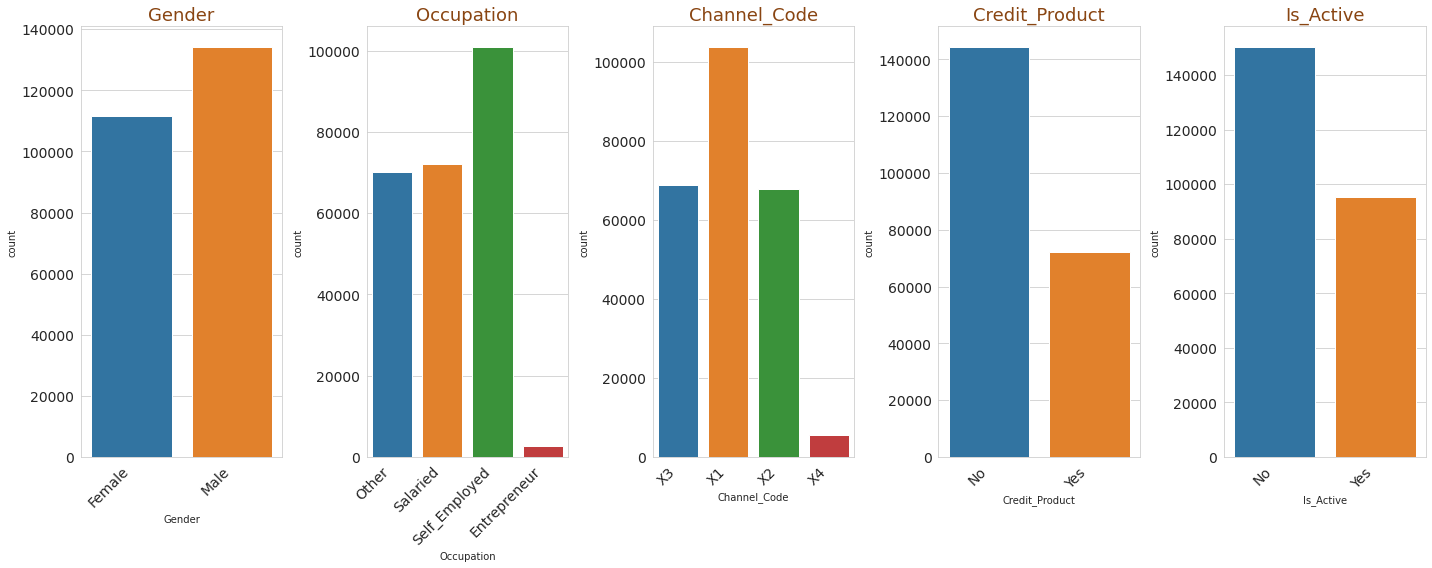

In [24]:
#####################################################################
# Calling the function
PlotBarCharts(inpData=train, colsToPlot=cat_var)

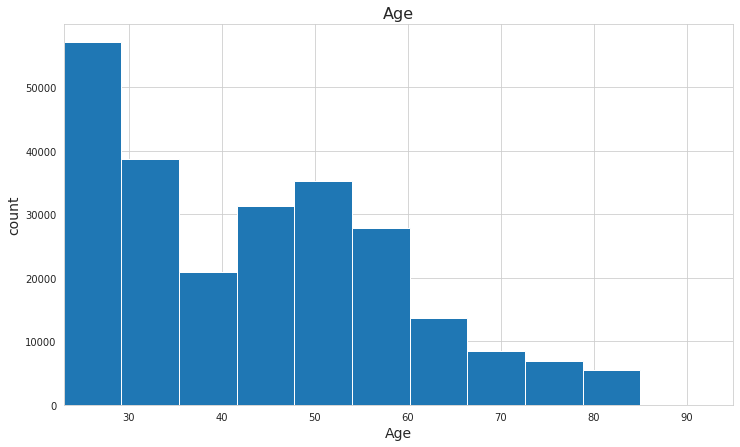

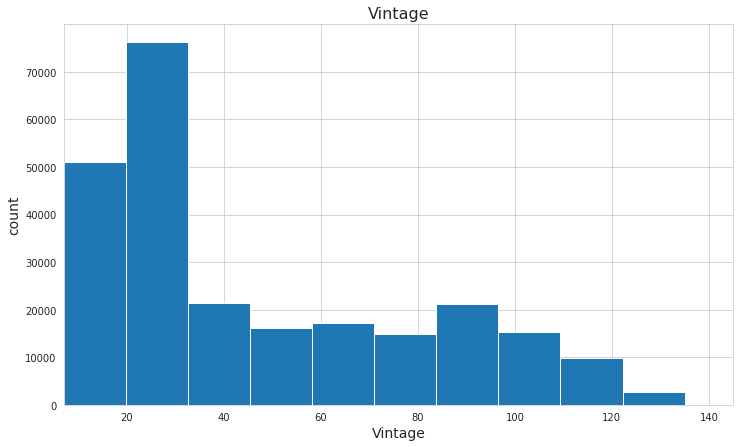

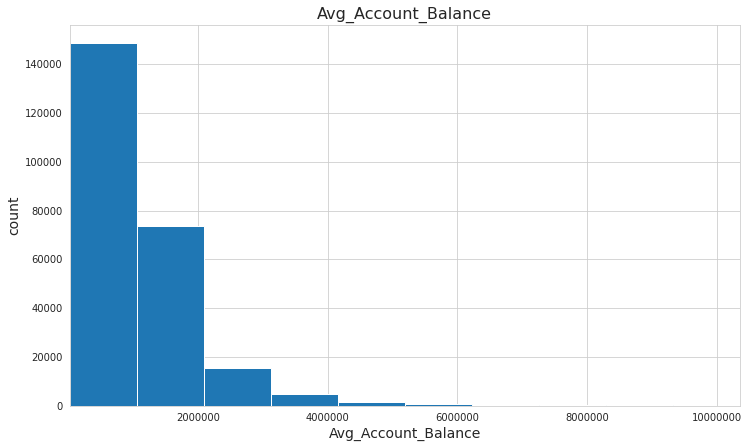

In [25]:
# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
for col in cont_var:
  fig, ax = plt.subplots(figsize=(12,7))
  ax.hist(train[col])
  plt.title(col, fontdict={'fontsize':16})
  plt.xlim(np.min(train[col]), np.max(train[col]) + 10)
  plt.xlabel(col, fontdict={'fontsize':14})
  plt.ylabel("count", fontdict={'fontsize':14})
  ax.ticklabel_format(axis="x", style="plain")
  plt.show();


**In "Avg_Account_Balance outliers after 5000000**

In [26]:
########  Avg_Account_Balance Greater than 4000000 
Avg_Account_Balance_G_T_4000000 = train[train['Avg_Account_Balance']>5000000].sort_values(by='Avg_Account_Balance',ascending=False).shape[0]
Avg_Account_Balance_G_T_4000000

1762

In [27]:
train['Avg_Account_Balance'][train['Avg_Account_Balance']>5000000] = np.mean(train['Avg_Account_Balance'])

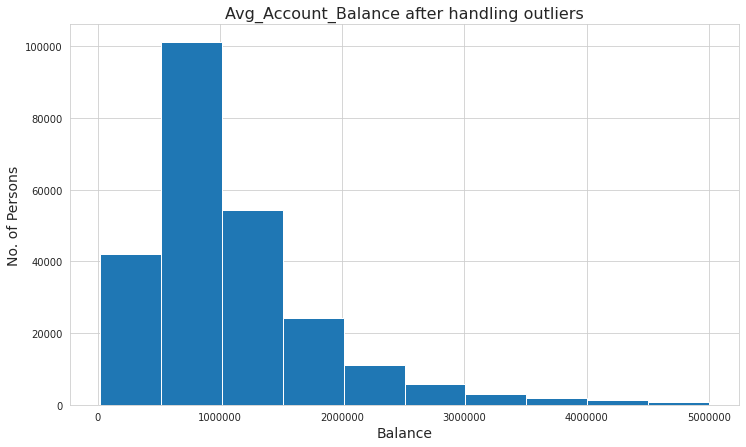

In [28]:
######## handling outliers in Avg_Account_Balance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,7))
ax.hist(train.Avg_Account_Balance)
plt.title("Avg_Account_Balance after handling outliers", fontdict={'fontsize':16})
plt.xlabel("Balance", fontdict={'fontsize':14})
plt.ylabel("No. of Persons", fontdict={'fontsize':14})
ax.ticklabel_format(axis="x", style="plain")
plt.show();

In [29]:
# Finding how many missing values
print(train.isna().sum(),'\n\n')

test.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64 




ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

I am using Median and Mode value for the missing value replacement

In [30]:
# Replacing missing values of Credit_Product of train with mode value
train['Credit_Product'].fillna(train['Credit_Product'].mode()[0], inplace=True)

# Replacing missing values of Credit_Product of test with Mode value
test['Credit_Product'].fillna(test['Credit_Product'].mode()[0], inplace=True)

In [31]:
# Checking missing values again after the treatment
print(train.isnull().sum(),'\n')
test.isnull().sum()

Gender                 0
Age                    0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64 



ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [32]:
### "continous variable" list
cont_var = ['Age','Avg_Account_Balance', 'Vintage']

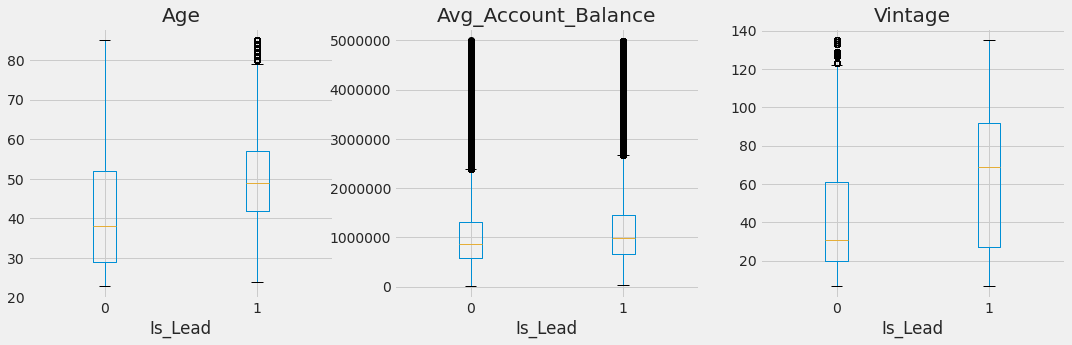

In [33]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
import matplotlib.style as style

style.use('fivethirtyeight')
fig, ax=plt.subplots(nrows=1, ncols=len(cont_var), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Is_Lead"
for i, PredictorCol in enumerate(cont_var):
    train.boxplot(column=PredictorCol, by='Is_Lead', figsize=(5,5), vert=True, ax=ax[i])
    ax[i].ticklabel_format(axis='y', style='plain')
    plt.suptitle("")


<b>If the distribution looks similar for each category(Boxes are in the same line), that means the the continuous variable has NO effect on the target variable. Hence, the variables are not correlated to each other.</b>


Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable
* Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)


In [34]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, cont_variables):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in cont_variables:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [35]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=cont_var
FunctionAnova(inpData=train, TargetVariable='Is_Lead', cont_variables=ContinuousVariables)

##### ANOVA Results ##### 

Age is correlated with Is_Lead | P-Value: 0.0
Avg_Account_Balance is correlated with Is_Lead | P-Value: 9.023649289114213e-215
Vintage is correlated with Is_Lead | P-Value: 0.0


['Age', 'Avg_Account_Balance', 'Vintage']

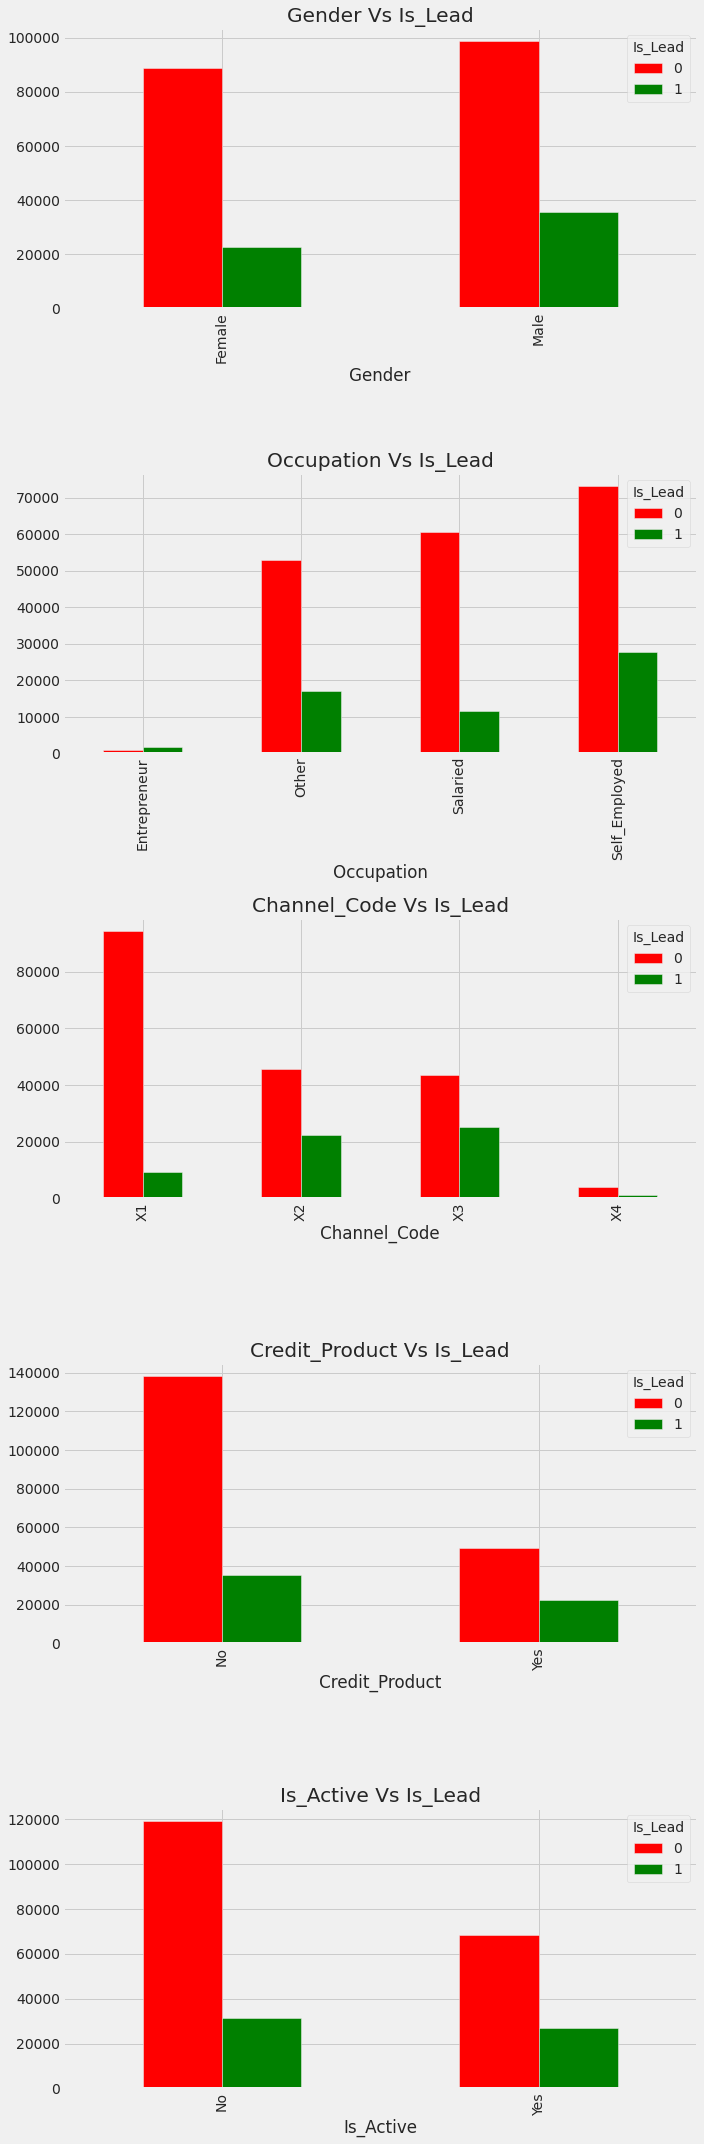

In [36]:
# Visual Inference using Grouped Bar charts
CategoricalColsList = cat_var

import matplotlib.pyplot as plt
fig, PlotCanvas = plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))
# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult = pd.crosstab(index=train[CategoricalCol], columns=train['Is_Lead'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Is_Lead')
    plt.tight_layout()

In [37]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [38]:
CategoricalVariables=cat_var

# Calling the function
FunctionChisq(inpData=train, 
              TargetVariable='Is_Lead',
              CategoricalVariablesList= CategoricalVariables)

Gender is correlated with Is_Lead | P-Value: 1.949380935011988e-279
Occupation is correlated with Is_Lead | P-Value: 0.0
Channel_Code is correlated with Is_Lead | P-Value: 0.0
Credit_Product is correlated with Is_Lead | P-Value: 0.0
Is_Active is correlated with Is_Lead | P-Value: 0.0


['Gender', 'Occupation', 'Channel_Code', 'Credit_Product', 'Is_Active']

# Selecting final predictors for Machine Learning
Based on the above tests, selecting the final columns for machine learning

In [39]:
SelectedColumns=['Age', 'Avg_Account_Balance', 'Vintage', 'Gender', 'Occupation',  'Channel_Code',
                 'Credit_Product','Is_Active']

# Selecting final columns
DataForML=train[SelectedColumns]
DataForML.head()

,Age,Avg_Account_Balance,Vintage,Gender,Occupation,Channel_Code,Credit_Product,Is_Active
0,73,1045696.0,43,Female,Other,X3,No,No
1,30,581988.0,32,Female,Salaried,X1,No,No
2,56,1484315.0,26,Female,Self_Employed,X3,No,Yes
3,34,470454.0,19,Male,Salaried,X1,No,No
4,30,886787.0,33,Female,Salaried,X1,No,No


## Converting the binary nominal variable to numeric using 1/0 mapping

In [40]:
# Converting the binary nominal variable sex to numeric
DataForML['Gender'].replace({'female':0, 'male':1}, inplace=True)

## Converting the nominal variable to numeric using get_dummies()

In [41]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML, drop_first=True)

# Adding Target Variable to the data
DataForML_Numeric['Is_Lead']=train['Is_Lead']

# Printing sample rows
DataForML_Numeric.head()

,Age,Avg_Account_Balance,Vintage,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Is_Lead
0,73,1045696.0,43,0,1,0,0,0,1,0,0,0,0
1,30,581988.0,32,0,0,1,0,0,0,0,0,0,0
2,56,1484315.0,26,0,0,0,1,0,1,0,0,1,0
3,34,470454.0,19,1,0,1,0,0,0,0,0,0,0
4,30,886787.0,33,0,0,1,0,0,0,0,0,0,0


In [42]:
# Target variable distribution in percentage
from collections import Counter

target = train.iloc[:,-1]
counter = Counter(target)

# 
for class_name,count in counter.items():
	per = count / len(target) * 100
	print('Class=%d, Count=%d, Percentage=%.2f%%' % (class_name, count, per))

Class=0, Count=187437, Percentage=76.28%
Class=1, Count=58288, Percentage=23.72%


In [43]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Age', 'Avg_Account_Balance', 'Vintage', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes', 'Is_Lead'],
      dtype='object')

In [44]:
# Separate Target Variable and Predictor Variables
TargetVariable='Is_Lead'
Predictors=['Age', 'Avg_Account_Balance', 'Vintage', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes']

X=DataForML_Numeric[Predictors]
y=DataForML_Numeric[TargetVariable]

In [45]:
# Balanced the dataset
from imblearn.combine import SMOTETomek

sm = SMOTETomek()
x_res, y_res = sm.fit_sample(X, y)
Counter(y_res)

Counter({0: 167098, 1: 167098})

In [46]:
# convert resampled data into dataframe
resampled_data = pd.DataFrame(x_res, columns = Predictors, dtype=np.uint64)

### Add Target Variable
resampled_data['Is_Lead'] = y_res
resampled_data.shape

(334196, 13)

In [47]:
#### Sample from dataset
resampled_data.sample(10)

,Age,Avg_Account_Balance,Vintage,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Yes,Is_Active_Yes,Is_Lead
64044,29,677806,27,1,1,0,0,0,0,0,0,0,0
80642,49,1146061,98,0,0,0,1,0,1,0,1,1,1
331201,36,883970,47,0,0,0,0,0,0,0,1,0,1
178854,29,2083472,19,0,0,1,0,0,0,0,0,0,0
170200,32,648543,26,0,0,1,0,0,0,0,0,0,0
57973,32,1900844,31,1,0,1,0,0,0,0,0,0,0
248908,55,2254720,31,0,1,0,0,1,0,0,0,0,1
238554,56,2234797,89,0,0,0,0,0,0,0,0,0,1
198837,27,657131,21,0,0,1,0,0,0,0,1,0,0
12961,36,761172,25,0,0,1,0,0,0,0,0,0,0


In [48]:
# Saving this final data for reference during deployment
resampled_data.to_pickle('credit_card_train.pkl')

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [49]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

x_data = resampled_data.drop(columns=['Is_Lead'], axis=1).values
y_data = resampled_data['Is_Lead'].values

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x_data)

# Generating the standardized values of X
X=PredictorScalerFit.transform(x_data)
y = y_data.copy()

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(233937, 12)
(233937,)
(100259, 12)
(100259,)


# Logistic Regression

In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)
pred_prob = LOG.predict_proba(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
#F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
#print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Printing the Overall Accuracy of the model
F1_Score=metrics.roc_auc_score(y_test, pred_prob[:,1], average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithmd
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='roc_auc')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

              precision    recall  f1-score   support

           0       0.74      0.83      0.79     50023
           1       0.81      0.71      0.76     50236

    accuracy                           0.77    100259
   macro avg       0.78      0.77      0.77    100259
weighted avg       0.78      0.77      0.77    100259

[[41744  8279]
 [14573 35663]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.66712241 0.67146107 0.67620149 0.92433052 0.92457405 0.9256646
 0.92421246 0.9259879  0.92316211 0.92450533]

Final Average Accuracy of the model: 0.85


# Decision Trees

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     50023
           1       0.77      0.75      0.76     50236

    accuracy                           0.76    100259
   macro avg       0.76      0.76      0.76    100259
weighted avg       0.76      0.76      0.76    100259

[[38761 11262]
 [12615 37621]]
Accuracy of the model on Testing Sample Data: 0.86

Accuracy values for 10-fold Cross Validation:
 [0.74376238 0.75238941 0.74977287 0.89759282 0.9002962  0.89822078
 0.89883203 0.89962923 0.89896002 0.89860925]

Final

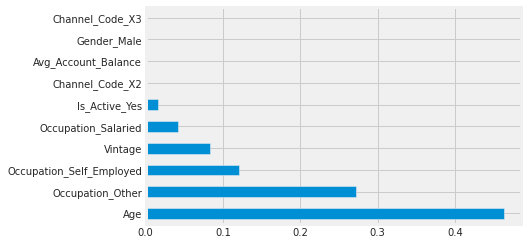

In [53]:
#Decision Trees
from sklearn import tree
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
clf = tree.DecisionTreeClassifier(max_depth=4,criterion='gini')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)
pred_prob = DTree.predict_proba(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.roc_auc_score(y_test, pred_prob[:,1], average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='roc_auc')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       0.80      0.87      0.83     50023
           1       0.85      0.78      0.82     50236

    accuracy                           0.82    100259
   macro avg       0.83      0.82      0.82    100259
weighted avg       0.83      0.82      0.82    100259

[[43308  6715]
 [10985 39251]]
Accuracy of the model on Testing Sample Data: 0.91

Accuracy values for 10-fold Cross Validation:

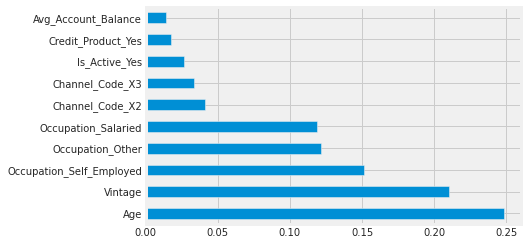

In [54]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose various values of max_depth, n_estimators and criterion for tuning the model
clf = RandomForestClassifier(max_depth=10, n_estimators=100,criterion='gini')


# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)
pred_prob = RF.predict_proba(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.roc_auc_score(y_test, pred_prob[:,1], average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='roc_auc')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

In [55]:
!pip install lightgbm

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     49985
           1       0.89      0.78      0.83     50236

    accuracy                           0.84    100221
   macro avg       0.84      0.84      0.84    100221
weighted avg       0.84      0.84      0.84    100221

[[44911  5074]
 [11060 39176]]
Accuracy of the model on Testing Sample Data: 0.92

Accuracy values for 10-fold Cross Validation:
 [0.78425241 0.79003125 0.7924276  0.97133606 0.97237129 0.97291325
 0.97278432 0.972

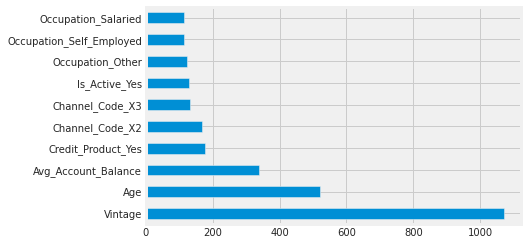

In [ ]:
from lightgbm import LGBMClassifier

clf=LGBMClassifier()

print(clf)

# Creating the model on Training Data
LGBM=clf.fit(X_train,y_train)
prediction=LGBM.predict(X_test)
pred_prob = LGBM.predict_proba(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.roc_auc_score(y_test, pred_prob[:,1], average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LGBM, X , y, cv=10, scoring='roc_auc')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(LGBM.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

**Final model**

In [56]:
resampled_data.columns

Index(['Age', 'Avg_Account_Balance', 'Vintage', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes', 'Is_Lead'],
      dtype='object')

In [57]:
# Separate Target Variable and Predictor Variables
TargetVariable='Is_Lead'
Predictors=['Age', 'Avg_Account_Balance', 'Vintage', 'Gender_Male',
       'Occupation_Other', 'Occupation_Salaried', 'Occupation_Self_Employed',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_Yes', 'Is_Active_Yes']


### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

x_data = resampled_data.drop(columns=['Is_Lead'], axis=1).values
y_data = resampled_data['Is_Lead'].values

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x_data)

# Generating the standardized values of X
X=PredictorScalerFit.transform(x_data)
y = y_data.copy()

**Retraining the model using 100% data**

In [58]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(objective='binary',
class_weight= None,
 learning_rate=0.51,
 max_depth=3,
 n_estimators=150)

fit = model.fit(X, y)

**Cross validating the final model accuracy with less predictors**

In [59]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(fit, X , y, cv=10, scoring='roc_auc')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.78072819 0.78621561 0.79366317 0.97383241 0.97317793 0.97276117
 0.97201516 0.97286379 0.97292409 0.97385118]

Final Average Accuracy of the model: 0.92


**Save the model as a serialized file which can be stored anywhere**

In [60]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('credit_card_LGBMClassifier.pkl', 'wb') as fileWriteStream:
    pickle.dump(fit, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


**Create a python function**

In [61]:
# This Function can be called from any from any front end tool/website
def PredictCustomerIntent(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('credit_card_train.pkl')
    InputData=InputData.append(DataForML.drop(['Is_Lead'], axis=1))
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData, drop_first=True)
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('credit_card_LGBMClassifier.pkl', 'rb') as fileReadStream:
        LGBMModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # Genrating Predictions
    Prediction=LGBMModel.predict(X)
    PredictedStatus=pd.DataFrame(Prediction, columns=['Predicted Status'])
    return(PredictedStatus)

In [62]:
# Calling the function for some loan applications
EmployeeDetails=pd.DataFrame(
data=[[73,1045696,35,0,1,0,0,0,1,0,0,0],
     [30,581988,67,0,0,1	,0,0,0,0,0,0]],
columns=Predictors)

print(EmployeeDetails)

# Calling the Function for prediction
PredictCustomerIntent(InputData= EmployeeDetails)

   Age  Avg_Account_Balance  ...  Credit_Product_Yes  Is_Active_Yes
0   73              1045696  ...                   0              0
1   30               581988  ...                   0              0

[2 rows x 12 columns]


,Predicted Status
0,1
1,1


In [63]:
# Creating the function which can take inputs and return predictions
def FunctionCustomerIntentPrediction(inp_Age, inp_Avg_Account_Balance,inp_Vintage, inp_Gender_Male, inp_Occupation_Other,
       inp_Occupation_Salaried, inp_Occupation_Self_Employed, inp_Channel_Code_X2,
       inp_Channel_Code_X3, inp_Channel_Code_X4, inp_Credit_Product_Yes,
       inp_Is_Active_Yes):
    
    # Creating a data frame for the model input
    SampleInputData=pd.DataFrame(
     data=[[inp_Age, inp_Avg_Account_Balance,inp_Vintage, inp_Gender_Male, inp_Occupation_Other,
       inp_Occupation_Salaried, inp_Occupation_Self_Employed, inp_Channel_Code_X2,
       inp_Channel_Code_X3, inp_Channel_Code_X4, inp_Credit_Product_Yes,
       inp_Is_Active_Yes]],
     columns=Predictors)

    # Calling the function defined above using the input parameters
    Predictions=PredictCustomerIntent(InputData= SampleInputData)

    # Returning the predictions
    return(Predictions.to_json())

# Function call
FunctionCustomerIntentPrediction(inp_Age = 30, 
                             inp_Avg_Account_Balance = 13000,
                             inp_Vintage = 34,
                             inp_Gender_Male = 1,
                             inp_Occupation_Other = 0,
                             inp_Occupation_Salaried = 1,
                             inp_Occupation_Self_Employed = 0,
                             inp_Channel_Code_X2 = 0,
                             inp_Channel_Code_X3 = 1,
                             inp_Channel_Code_X4 = 0,
                             inp_Credit_Product_Yes = 1,
                             inp_Is_Active_Yes = 0
                             )

'{"Predicted Status":{"0":1}}'